In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

In [43]:
full_df = pd.read_excel('DESCRIPCIONES_TODAS.xlsx')
full_df = full_df.dropna(subset='Código de la especie (id taxon)')
full_df

,Nombres comunes,Nombre aceptado,Fuente,Grupo taxonómico,Descripción,Código de la especie (id taxon)
0,Abejaruco europeo,Merops apiaster,SEO BirdLife,Aves,"Esta ave, del tamaño de un zorzal común, se di...",10738.0
1,Abejero europeo,Pernis apivorus,SEO BirdLife,Aves,La coloración de esta especie presenta conside...,10739.0
2,Abubilla común,Upupa epops,SEO BirdLife,Aves,La abubilla común es un ave de aspecto inconfu...,11211.0
3,Acentor alpino,Prunella collaris,SEO BirdLife,Aves,El acentor alpino es un pájaro robusto y compa...,11054.0
4,Acentor común,Prunella modularis,SEO BirdLife,Aves,El acentor común es un pájaro del tamaño de un...,11761.0
...,...,...,...,...,...,...
3455,Culebra bastarda,Malpolon monspessulanus,VertebradosIbericos - Reptiles,Reptiles,"Cabeza alta, estrecha, con hocico agudo. Escam...",11772.0
3456,Culebrilla de las macetas,Ramphotyphlops braminus,VertebradosIbericos - Reptiles,Reptiles,Pequeño ofidio perteneciente a la familia Typh...,36635.0
3457,Víbora áspid,Vipera aspis,VertebradosIbericos - Reptiles,Reptiles,Se trata de una serpiente de mediano tamaño (m...,10772.0
3458,Víbora hocicuda,Vipera latastei Boscá,VertebradosIbericos - Reptiles,Reptiles,"Se caracteriza por su cuerpo grueso y corto, c...",11567.0


In [45]:
# Descripcion mas corta que tenemos
print(full_df.iloc[int(np.argmin(full_df['Descripción'].str.len()))]['Descripción'])

Tiene sus hojas con tres pares de lóbulos profundos, agudos.


In [46]:
# Descripcion mas larga que tenemos
print(textwrap.fill(full_df.iloc[int(np.argmax(full_df['Descripción'].str.len()))]['Descripción'], 210))

Quercus faginea es un árbol caducifolio de hasta 20 m de altura, pero puede verse reducido a un arbusto según la degradación del suelo y la acción humana a la que se vea sometido. En general, el tronco es
derecho, con la corteza rugosa, de poco espesor y de color grisáceo o pardo-grisáceo, con numerosas grietas poco profundas en los ejemplares de edad. Las ramillas son pardo rojizas o grisáceas, cubiertas de
tricomas que se pierden al formarse la corteza. Tiene una copa redondeada ovoide o alargada, con follaje no muy denso, de aspecto menos compacto y más claro que el de la encina (López González, 2001). Las yemas
son tomentosas, de 3-5 mm de longitud. Las hojas son simples, alternas, con estípulas largas y estrechas, que se caen con facilidad. Aunque son muy variables en tamaño y forma, las hojas tienen entre 3-14 cm de
longitud (incluso menores en los rebrotes) y 1,5-8 cm de anchura. La lámina es coriácea, pero mucho menos que la de las quercíneas perennifolias, con forma oblonga, a

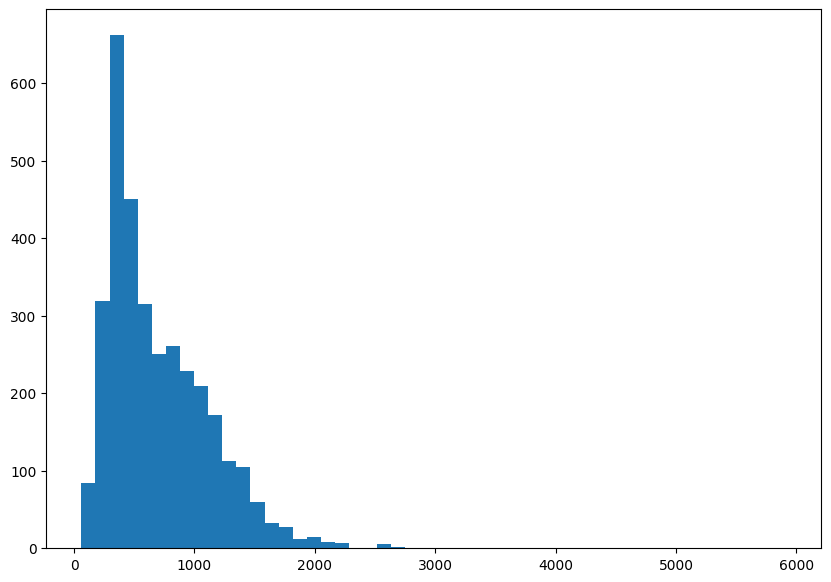

In [48]:
plt.figure(figsize=(10,7))
plt.hist(full_df['Descripción'].str.len(), bins=50)
plt.show()

In [49]:
df = pd.read_excel('Descripciones_Gemini_Cortas.xlsx')

In [50]:
df['EVALUACIÓN'].value_counts()

EVALUACIÓN
MAL     188
BIEN    153
DUDA     66
Name: count, dtype: int64

In [51]:
df['calificacion'] = df['EVALUACIÓN'].apply(lambda x: {'BIEN': 1, 'DUDA': 1, 'MAL': 0}[x])
df['x'] = df['Descripción Original'].str.len().apply(lambda x: x // 10)

In [52]:
df = df.sort_values(by='x', ascending=True)

In [53]:
x = df['x'].tolist()
y = df['calificacion'].tolist()
x_values = list(set(x))
aggregated = [np.mean([y[j] for j in range(len(x)) if np.abs(x[j] - x_values[i]) <= 1]) for i in range(len(x_values))]

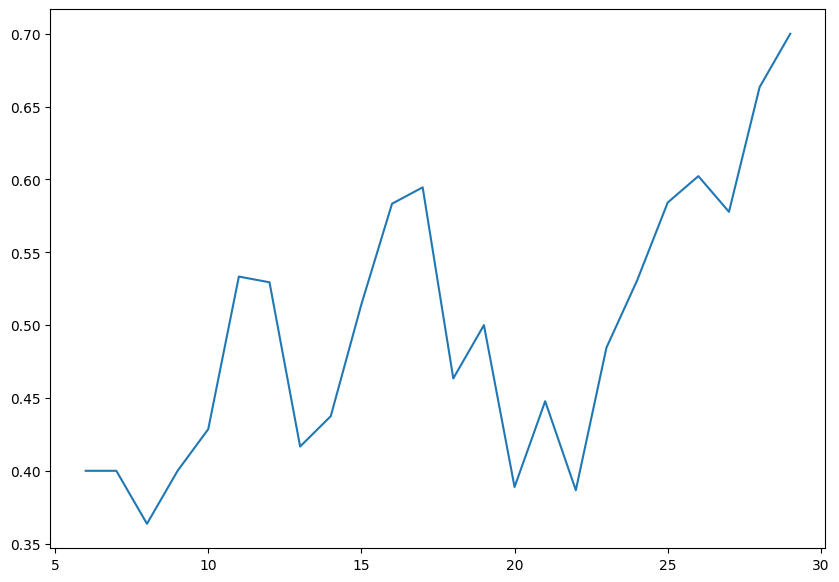

In [54]:
plt.figure(figsize=(10,7))
plt.plot(x_values, aggregated)
plt.show()